# RT-DETR Training Notebook - IR

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/user/Shivam/dsr_project/Project_files


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24184MiB)
Setup complete ✅ (32 CPUs, 125.5 GB RAM, 1769.8/1832.2 GB disk)


## Load Pretrained RT-DETR_l model and Validate


0: 640x640 1 fire hydrant, 13.5ms
Speed: 1.3ms preprocess, 13.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


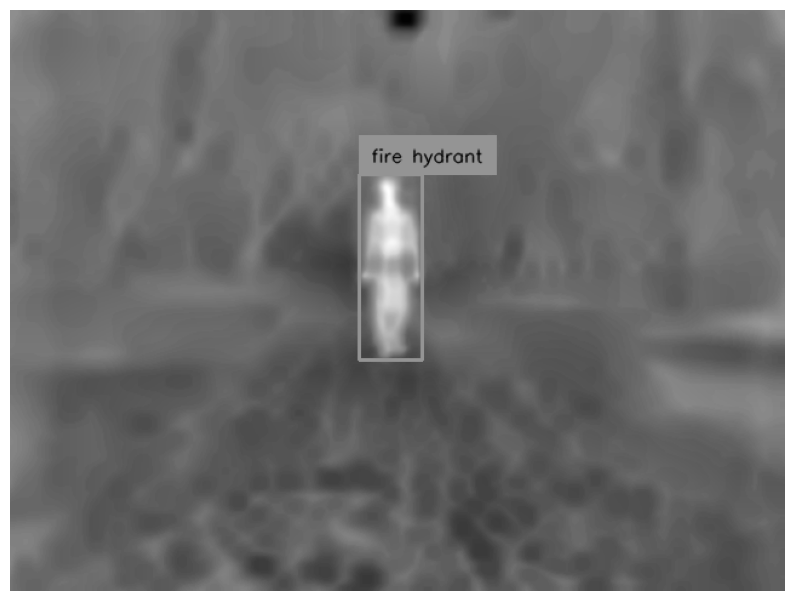

In [4]:
from ultralytics import RTDETR
from PIL import Image
import supervision as sv

# Load the pretrained RT-DETR model (Large variant)
model = RTDETR('rtdetr-l.pt')

# Open a test image
image = Image.open(r'/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/images/test/flir_2208.jpg')

# Run inference
result = model.predict(image, conf=0.25)[0]

# Visualize detections
detections = sv.Detections.from_ultralytics(result)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)
sv.plot_image(annotated_image, size=(10, 10))


## Training RT-DETR_l Model

In [5]:
from ultralytics import RTDETR

# Load pretrained RT-DETR model (Large version)
model = RTDETR('rtdetr-l.pt')

# Train on your dataset
results = model.train(
    data="/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    name='train_l',
    project="/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir",
    workers=4,
    verbose=True
    
)


New https://pypi.org/project/ultralytics/8.3.126 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24184MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-l.pt, data=/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir, name=train_l, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=

train: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/train.cache... 22096 images, 1421 backgrounds, 0 corrupt: 100%|██████████| 22096/22096 [00:00<?, ?it/s]
val: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/val.cache... 6313 images, 392 backgrounds, 0 corrupt: 100%|██████████| 6313/6313 [00:00<?, ?it/s]


Plotting labels to /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_l/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_l
Starting training for 100 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
      1/100      13.4G     0.7869       2.38     0.2386         95        640: 100%|██████████| 1381/1381 [05:35<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:23<00:00,  8.30it/s]


                   all       6313      22790      0.913      0.543      0.579      0.377

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
      2/100      13.3G     0.7335     0.5273     0.1218         70        640: 100%|██████████| 1381/1381 [05:30<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:23<00:00,  8.28it/s]


                   all       6313      22790      0.834      0.666      0.678      0.386

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
      3/100      13.3G     0.8978     0.4967     0.1436         78        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:23<00:00,  8.29it/s]


                   all       6313      22790      0.819      0.618      0.644      0.264

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
      4/100      13.7G     0.9128     0.5027     0.1483         58        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.22it/s]


                   all       6313      22790      0.873      0.682      0.717      0.383

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
      5/100      13.4G     0.8757     0.5129     0.1409        110        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.21it/s]


                   all       6313      22790       0.83      0.647      0.668      0.352

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
      6/100      13.2G     0.8558     0.5139     0.1339        155        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.24it/s]


                   all       6313      22790      0.849      0.613      0.674      0.353

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
      7/100      13.4G     0.8364     0.5187     0.1308         60        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.20it/s]


                   all       6313      22790       0.84      0.652      0.686      0.339

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
      8/100      13.4G     0.7972     0.5275     0.1236         89        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.887      0.683      0.733      0.408

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
      9/100      13.7G     0.8057     0.5201     0.1257         74        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.887      0.678      0.729      0.423

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     10/100      13.3G     0.8144     0.5055     0.1236         68        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.23it/s]


                   all       6313      22790      0.828      0.692      0.725      0.413

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     11/100      13.4G     0.7859     0.5221     0.1195         97        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.15it/s]


                   all       6313      22790      0.833      0.739      0.771       0.47

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     12/100      13.6G     0.7724     0.5162     0.1173         65        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.11it/s]


                   all       6313      22790       0.85      0.775      0.797      0.492

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     13/100      13.8G     0.7816     0.5132     0.1168         79        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.844      0.781      0.802      0.451

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     14/100      13.4G     0.7784     0.5192     0.1165         71        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.23it/s]


                   all       6313      22790      0.839       0.79      0.809      0.516

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     15/100      13.4G     0.7715     0.5129     0.1145         86        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.19it/s]


                   all       6313      22790      0.864      0.773      0.801      0.467

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     16/100      13.4G     0.7637       0.52     0.1129        114        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.19it/s]


                   all       6313      22790      0.864      0.766      0.801       0.47

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     17/100      13.6G     0.7729     0.5125     0.1148         43        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.876      0.777      0.809      0.496

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     18/100      13.4G     0.7621     0.5231     0.1128        121        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.22it/s]


                   all       6313      22790      0.885      0.774      0.814      0.522

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     19/100      13.4G     0.7535     0.5161     0.1116         66        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.884      0.772       0.81      0.521

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     20/100      13.5G     0.7591     0.5158     0.1105        111        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.16it/s]


                   all       6313      22790      0.876      0.756      0.814      0.513

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     21/100      13.8G     0.7222     0.5249     0.1058         60        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.17it/s]


                   all       6313      22790      0.882      0.776      0.822      0.541

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     22/100      13.4G     0.7349     0.5109     0.1065        116        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.21it/s]


                   all       6313      22790      0.885      0.767      0.825       0.55

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     23/100      13.5G     0.7239     0.5145      0.105        117        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.17it/s]


                   all       6313      22790      0.873      0.783       0.82       0.53

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     24/100      13.6G     0.7377     0.5069     0.1068         63        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.15it/s]


                   all       6313      22790      0.879      0.784       0.83      0.549

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     25/100      13.5G     0.7348     0.5061     0.1058         51        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.15it/s]


                   all       6313      22790      0.882      0.779      0.827      0.561

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     26/100      13.2G     0.7235     0.5178     0.1047        100        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.882      0.777      0.832      0.565

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     27/100      13.3G     0.7103     0.5237     0.1031         91        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.12it/s]


                   all       6313      22790      0.884      0.793      0.835      0.557

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     28/100      13.6G     0.7143     0.5171      0.104         66        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.13it/s]


                   all       6313      22790      0.878      0.802      0.832      0.531

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     29/100      13.7G     0.6867     0.5103     0.0977         91        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.16it/s]


                   all       6313      22790      0.885      0.807      0.837      0.549

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     30/100      13.3G     0.7356     0.5056     0.1054         73        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.16it/s]


                   all       6313      22790      0.872      0.798      0.837      0.552

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     31/100      13.6G     0.7183     0.5044     0.1022         74        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790       0.86      0.787      0.831      0.561

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     32/100      13.6G     0.6934     0.5149    0.09967         71        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.15it/s]


                   all       6313      22790      0.876      0.782      0.836      0.559

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     33/100        14G     0.6968     0.5166     0.1005        142        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.875      0.797      0.842      0.576

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     34/100      13.4G     0.6923     0.5186    0.09961        112        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.16it/s]


                   all       6313      22790      0.872      0.791      0.839      0.578

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     35/100      13.5G      0.698     0.5187    0.09934         79        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.885      0.788      0.839      0.568

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     36/100      13.6G        0.7     0.5108    0.09982         58        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.15it/s]


                   all       6313      22790      0.897      0.798      0.842      0.577

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     37/100      13.4G     0.6885     0.5189    0.09873        113        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.15it/s]


                   all       6313      22790       0.89      0.796      0.845      0.587

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     38/100      13.4G     0.6738     0.5148    0.09545         81        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.17it/s]


                   all       6313      22790      0.866      0.808      0.849      0.584

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     39/100      13.4G     0.6935     0.5034     0.0986         80        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.885      0.795      0.847      0.582

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     40/100      13.6G      0.657     0.4983    0.09233         80        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.15it/s]


                   all       6313      22790      0.871        0.8      0.845      0.582

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     41/100      13.5G     0.6689     0.5269     0.0959         81        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.13it/s]


                   all       6313      22790      0.877      0.805      0.842      0.581

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     42/100      13.4G     0.6346     0.5071    0.08899         64        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.871      0.799      0.842       0.58

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     43/100      13.4G       0.63     0.5053    0.08787        133        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790       0.86      0.808      0.843      0.576

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     44/100      13.6G     0.6513     0.5115    0.09081         49        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.857      0.812      0.845      0.576

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     45/100      12.9G       0.65     0.5239    0.09243         43        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.13it/s]


                   all       6313      22790      0.854      0.811      0.845       0.58

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     46/100      13.4G     0.6355     0.5102    0.08823         69        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.15it/s]


                   all       6313      22790      0.853       0.81      0.845      0.578

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     47/100      13.9G     0.6408     0.5051    0.08907         56        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.15it/s]


                   all       6313      22790      0.853      0.808      0.846      0.578

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     48/100      13.8G     0.6392     0.5046    0.08845         62        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.13it/s]


                   all       6313      22790      0.854      0.808      0.847      0.575

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     49/100      13.4G     0.6507      0.523    0.09044         57        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.853       0.81      0.846      0.572

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     50/100      13.4G     0.7062     0.5199    0.09733        113        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.17it/s]


                   all       6313      22790      0.851      0.813      0.847      0.568

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     51/100      13.2G     0.6272     0.5041    0.08438         76        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.855       0.81      0.847      0.568

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     52/100      13.4G     0.6842     0.5104    0.09317         83        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.13it/s]


                   all       6313      22790      0.854      0.813      0.848      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     53/100      13.9G     0.6572     0.5329    0.09131         72        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.852      0.812      0.847      0.559

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     54/100      13.4G     0.6237     0.5082    0.08508         96        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.853      0.813      0.848      0.556

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     55/100      13.3G     0.7224     0.5194    0.09849        133        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.12it/s]


                   all       6313      22790      0.857       0.81      0.849      0.553

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     56/100      13.6G     0.6907     0.5323     0.0935         68        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.852      0.815      0.848      0.551

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     57/100      13.5G     0.7323     0.5315    0.09906         75        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.846       0.82      0.847      0.546

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     58/100      13.4G     0.6407     0.5277     0.0866         98        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.17it/s]


                   all       6313      22790      0.848      0.819      0.847      0.545

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     59/100      13.4G     0.6797     0.5151    0.09099         78        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.04it/s]


                   all       6313      22790      0.853      0.819      0.847      0.545

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     60/100      13.3G     0.6594     0.5253    0.08721         50        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.16it/s]


                   all       6313      22790      0.849       0.82      0.846      0.541

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     61/100      14.2G     0.6277     0.5156     0.0829         96        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.855      0.815      0.847      0.537

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     62/100      13.3G     0.5568     0.4966    0.07496         46        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.19it/s]


                   all       6313      22790      0.851      0.818      0.846      0.534

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     63/100      13.4G     0.5858     0.4957    0.07732         70        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.15it/s]


                   all       6313      22790      0.839      0.824      0.846      0.531

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     64/100      13.9G     0.6643     0.5108    0.08874         77        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.843      0.825      0.847      0.526

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     65/100      13.4G     0.5912     0.4991    0.07896         81        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.13it/s]


                   all       6313      22790      0.845      0.827      0.847      0.523

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     66/100      13.4G     0.6465     0.5037    0.08621         80        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.17it/s]


                   all       6313      22790      0.849      0.831      0.848      0.521

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     67/100      13.4G     0.7407     0.5409     0.1027         79        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.851      0.829      0.847      0.515

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     68/100      13.9G     0.6694     0.4915     0.0912         87        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.12it/s]


                   all       6313      22790      0.856      0.822      0.846      0.512

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     69/100      13.4G      0.669     0.5125    0.08726         99        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.852      0.822      0.847      0.509

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     70/100      13.4G     0.6439     0.4938    0.08384        117        640: 100%|██████████| 1381/1381 [05:32<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.20it/s]


                   all       6313      22790      0.852       0.82      0.844      0.501

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     71/100      13.5G     0.7607     0.5244     0.1005         86        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.12it/s]


                   all       6313      22790      0.853      0.819      0.843      0.495

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     72/100      13.7G     0.7445     0.5366     0.0958        113        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.12it/s]


                   all       6313      22790      0.853      0.819      0.844      0.488

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     73/100      13.5G     0.7151     0.5036    0.09192         82        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.13it/s]


                   all       6313      22790      0.853      0.816      0.844      0.484

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     74/100      13.4G      0.711     0.5388    0.09252         58        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.17it/s]


                   all       6313      22790      0.851      0.816      0.843       0.48

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     75/100      12.8G     0.6636     0.5159    0.08514        104        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.07it/s]


                   all       6313      22790      0.854      0.815      0.842      0.473

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     76/100      13.6G     0.7168     0.5055    0.09277         68        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.852      0.814      0.841      0.467

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     77/100      13.5G     0.7881     0.5569     0.1019         87        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.12it/s]


                   all       6313      22790      0.849      0.819       0.84      0.458

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     78/100      13.2G     0.7118     0.5336     0.0902         91        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.849      0.818       0.84      0.452

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     79/100      13.4G     0.7072     0.5348    0.09262         81        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.846      0.818      0.836      0.444

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     80/100      14.1G     0.5125     0.4729    0.06522        112        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.15it/s]


                   all       6313      22790      0.835       0.81      0.834      0.438

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     81/100      13.3G     0.4677     0.4447    0.06079        125        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.12it/s]


                   all       6313      22790      0.808      0.787      0.823       0.43

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     82/100      12.9G       0.63     0.4735    0.07917         63        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.801      0.781       0.82       0.43

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     83/100      13.2G     0.7202     0.4948     0.1001        117        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.13it/s]


                   all       6313      22790      0.805      0.753      0.808       0.42

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     84/100      13.7G      0.548     0.4415    0.07058         64        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.812      0.723      0.796      0.411

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     85/100      13.2G     0.7239      0.518    0.08995         58        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.18it/s]


                   all       6313      22790      0.815      0.727      0.797      0.409

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     86/100      13.3G     0.6548     0.5034    0.08035         73        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.17it/s]


                   all       6313      22790      0.821      0.718      0.794      0.406

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     87/100      13.6G     0.7741     0.5282     0.1011         88        640: 100%|██████████| 1381/1381 [05:29<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790       0.83      0.718        0.8      0.411

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     88/100      13.3G       0.59     0.5094    0.07211         74        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.829      0.735      0.806      0.415

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     89/100      13.5G     0.5262     0.4755    0.06529         67        640: 100%|██████████| 1381/1381 [05:28<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.16it/s]


                   all       6313      22790       0.82      0.764      0.815      0.421

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     90/100      13.5G     0.5944     0.4852    0.07393         58        640: 100%|██████████| 1381/1381 [05:32<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.14it/s]


                   all       6313      22790      0.843      0.783      0.826      0.426
Closing dataloader mosaic

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     91/100      13.4G     0.6429     0.4903    0.09188         43        640: 100%|██████████| 1381/1381 [05:30<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.09it/s]


                   all       6313      22790      0.859      0.796      0.832      0.434

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     92/100      13.5G     0.5705     0.5042    0.07762         63        640: 100%|██████████| 1381/1381 [05:36<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.88it/s]


                   all       6313      22790      0.861      0.802      0.834      0.442

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     93/100      13.8G     0.6506     0.4585    0.09607         33        640: 100%|██████████| 1381/1381 [05:35<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:25<00:00,  7.87it/s]


                   all       6313      22790      0.863      0.808      0.837      0.455

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     94/100      13.4G     0.6558     0.5163    0.08959         62        640: 100%|██████████| 1381/1381 [05:30<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:23<00:00,  8.33it/s]


                   all       6313      22790      0.863      0.808      0.837      0.456

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     95/100      13.6G     0.5583     0.5168    0.07643         64        640: 100%|██████████| 1381/1381 [05:25<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:23<00:00,  8.33it/s]


                   all       6313      22790      0.865      0.811      0.839      0.466

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     96/100      13.8G     0.5256     0.4993    0.07163         81        640: 100%|██████████| 1381/1381 [05:23<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:23<00:00,  8.32it/s]


                   all       6313      22790      0.869      0.814      0.844      0.479

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     97/100      13.4G     0.3927     0.4121    0.05591         57        640: 100%|██████████| 1381/1381 [05:23<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:23<00:00,  8.33it/s]


                   all       6313      22790      0.867      0.815      0.846      0.488

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     98/100      13.5G     0.3366     0.3692    0.05055         49        640: 100%|██████████| 1381/1381 [05:24<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:23<00:00,  8.36it/s]


                   all       6313      22790      0.867      0.815      0.847      0.498

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
     99/100      13.5G     0.3026     0.3539    0.04785         58        640: 100%|██████████| 1381/1381 [05:24<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:23<00:00,  8.27it/s]


                   all       6313      22790      0.861      0.818      0.848      0.506

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
    100/100      13.5G     0.4168     0.3969    0.05582         49        640: 100%|██████████| 1381/1381 [05:26<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:24<00:00,  8.21it/s]


                   all       6313      22790      0.859       0.82      0.851      0.516

100 epochs completed in 9.858 hours.
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_l/weights/last.pt, 66.2MB
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_l/weights/best.pt, 66.2MB

Validating /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_l/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24184MiB)
rt-detr-l summary: 502 layers, 31,996,070 parameters, 0 gradients, 103.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:23<00:00,  8.46it/s]


                   all       6313      22790      0.891      0.796      0.845      0.587
                Person       4194      12644      0.962      0.706      0.929      0.576
                   Car       1183       4435      0.816      0.899      0.918      0.642
         Vehicle_Other       1824       3067      0.962      0.985      0.986      0.809
                   JCB       1314       1314          1          1      0.995      0.835
           Two_Wheeler        363       1298      0.809       0.81      0.852      0.451
             Dont_Care         19         32      0.795      0.375      0.392      0.207
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_l


## Testing RT-DERT_l Model

In [6]:
from ultralytics import RTDETR

# Load fine-tuned model
model = RTDETR('/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_l/weights/best.pt')

# Run evaluation on test set
metrics = model.val(
    split='test',
    name='test_l',
    project="/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir"
)

# Show test metrics
print(metrics)


Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24184MiB)


rt-detr-l summary: 502 layers, 31,996,070 parameters, 0 gradients, 103.5 GFLOPs


val: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/test.cache... 3157 images, 194 backgrounds, 0 corrupt: 100%|██████████| 3157/3157 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:19<00:00,  9.92it/s]


                   all       3157      11975      0.925      0.844      0.905      0.627
                Person       2123       6587      0.967      0.699      0.927      0.572
                   Car        572       2335      0.802      0.912      0.929      0.648
         Vehicle_Other        966       1618      0.962      0.988      0.989      0.811
                   JCB        683        683      0.999          1      0.995      0.828
           Two_Wheeler        175        739       0.82      0.775      0.842      0.437
             Dont_Care          9         13          1      0.689      0.749      0.465
Speed: 0.1ms preprocess, 5.0ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/test_l
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix ob

## Load Pretrained RT-DETR_x model and Validate


0: 640x640 1 fire hydrant, 1 giraffe, 18.3ms
Speed: 1.0ms preprocess, 18.3ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


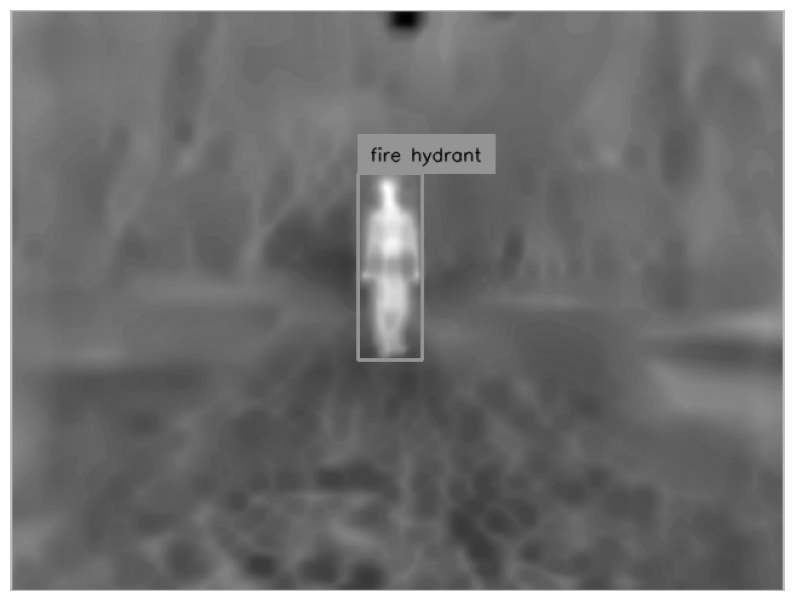

In [7]:
from ultralytics import RTDETR
from PIL import Image
import supervision as sv

# Load the pretrained RT-DETR model (Large variant)
model = RTDETR('rtdetr-x.pt')

# Open a test image
image = Image.open(r'/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/images/test/flir_2208.jpg')

# Run inference
result = model.predict(image, conf=0.25)[0]

# Visualize detections
detections = sv.Detections.from_ultralytics(result)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)
sv.plot_image(annotated_image, size=(10, 10))


## Training RT-DETR_x Model

In [2]:
from ultralytics import RTDETR

# Load pretrained RT-DETR model (Large version)
model = RTDETR('rtdetr-x.pt')

# Train on your dataset
results = model.train(
    data="/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    name='train_x',
    project="/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir",
    workers=4,
    verbose=True
    
)

New https://pypi.org/project/ultralytics/8.3.127 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24184MiB)
engine/trainer: task=detect, mode=train, model=rtdetr-x.pt, data=/home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir, name=train_x, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=

train: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/train.cache... 22096 images, 1421 backgrounds, 0 corrupt: 100%|██████████| 22096/22096 [00:00<?, ?it/s]
val: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/val.cache... 6313 images, 392 backgrounds, 0 corrupt: 100%|██████████| 6313/6313 [00:00<?, ?it/s]


Plotting labels to /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_x/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 193 weight(decay=0.0), 256 weight(decay=0.0005), 276 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_x
Starting training for 100 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      1/100      18.6G     0.7723      2.615     0.1975         95        640: 100%|██████████| 1381/1381 [07:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.12it/s]


                   all       6313      22790      0.915      0.548      0.616       0.38

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      2/100      18.6G     0.7503     0.5185     0.1209         70        640: 100%|██████████| 1381/1381 [06:59<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.14it/s]


                   all       6313      22790       0.81      0.606      0.611      0.266

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      3/100      18.3G     0.8291     0.5189     0.1312         78        640: 100%|██████████| 1381/1381 [06:56<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.13it/s]


                   all       6313      22790      0.873      0.632      0.681      0.391

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      4/100      18.3G     0.8432     0.5258     0.1373         58        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.12it/s]


                   all       6313      22790      0.882      0.667       0.71      0.405

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      5/100      18.6G     0.7608     0.5338     0.1235        110        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790      0.907      0.666      0.716      0.412

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      6/100      18.6G     0.6996     0.5341     0.1112        155        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.12it/s]


                   all       6313      22790      0.876      0.637      0.692      0.333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      7/100      18.8G     0.6799     0.5264     0.1074         60        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790      0.726      0.728      0.757      0.482

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      8/100      17.8G     0.6744     0.5297     0.1054         89        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790      0.909        0.7      0.748      0.444

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
      9/100      18.4G     0.6478     0.5371     0.1015         74        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790      0.908      0.742       0.77      0.476

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     10/100      18.5G     0.6751     0.5267     0.1017         68        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790      0.905      0.742      0.769       0.48

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     11/100      18.6G     0.6345     0.5274    0.09786         97        640: 100%|██████████| 1381/1381 [07:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.07it/s]


                   all       6313      22790      0.913      0.729      0.773      0.497

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     12/100      18.5G     0.6484     0.5197     0.0986         65        640: 100%|██████████| 1381/1381 [06:57<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790      0.921      0.715      0.788      0.505

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     13/100      18.4G     0.6119      0.529    0.09353         79        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790      0.877       0.75      0.786       0.51

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     14/100      18.6G     0.6247     0.5204    0.09331         71        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790       0.85        0.8       0.82      0.503

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     15/100      18.5G      0.638     0.5239    0.09559         86        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790      0.848       0.81      0.815      0.528

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     16/100      18.5G     0.6027     0.5186    0.09006        114        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.10it/s]


                   all       6313      22790      0.868      0.814      0.829      0.536

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     17/100      18.6G     0.6138      0.521    0.09109         43        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.10it/s]


                   all       6313      22790      0.885      0.775      0.833      0.516

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     18/100      18.5G     0.5959     0.5131    0.08846        121        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790      0.849      0.837       0.85      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     19/100      18.6G     0.6647     0.5119    0.09728         66        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790      0.858      0.833      0.847      0.548

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     20/100        18G     0.5965     0.5163    0.08713        111        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.10it/s]


                   all       6313      22790      0.878      0.824      0.843      0.556

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     21/100      18.5G     0.5909     0.5199    0.08733         60        640: 100%|██████████| 1381/1381 [06:57<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.09it/s]


                   all       6313      22790      0.883      0.823       0.85      0.564

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     22/100      18.6G     0.5714     0.5035    0.08367        116        640: 100%|██████████| 1381/1381 [06:57<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:34<00:00,  5.80it/s]


                   all       6313      22790      0.899      0.807      0.854      0.572

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     23/100      18.8G     0.5843     0.5117    0.08644        117        640: 100%|██████████| 1381/1381 [07:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.93it/s]


                   all       6313      22790      0.901      0.813      0.847       0.58

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     24/100      18.4G      0.578     0.5017    0.08478         63        640: 100%|██████████| 1381/1381 [07:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.95it/s]


                   all       6313      22790      0.875      0.839      0.858      0.577

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     25/100      18.5G     0.5773     0.5033      0.084         51        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.85it/s]


                   all       6313      22790      0.886      0.819       0.86      0.585

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     26/100      18.6G     0.5574     0.5085    0.08086        100        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.96it/s]


                   all       6313      22790      0.864      0.834      0.859      0.566

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     27/100      18.3G     0.6735     0.5302    0.09628         91        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.07it/s]


                   all       6313      22790      0.867      0.806      0.843      0.518

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     28/100      18.7G     0.5685     0.5023    0.08264         66        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.97it/s]


                   all       6313      22790      0.876      0.833      0.856      0.573

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     29/100      18.6G      0.595     0.5219     0.0854         91        640: 100%|██████████| 1381/1381 [07:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.10it/s]


                   all       6313      22790      0.872       0.83      0.855       0.58

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     30/100      18.4G     0.5566     0.5054     0.0818         73        640: 100%|██████████| 1381/1381 [06:58<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.87it/s]


                   all       6313      22790       0.87      0.834      0.854      0.576

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     31/100      18.5G     0.5506     0.5023    0.07947         74        640: 100%|██████████| 1381/1381 [07:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.04it/s]


                   all       6313      22790      0.877      0.831      0.859      0.593

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     32/100      18.7G     0.6128      0.509    0.08702         71        640: 100%|██████████| 1381/1381 [07:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.03it/s]


                   all       6313      22790      0.876      0.829       0.86      0.584

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     33/100      18.4G     0.5861     0.5064    0.08433        142        640: 100%|██████████| 1381/1381 [07:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.06it/s]


                   all       6313      22790      0.865      0.852      0.864      0.588

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     34/100      18.9G     0.5724     0.5045    0.08198        112        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.95it/s]


                   all       6313      22790      0.855      0.838      0.862       0.59

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     35/100      18.8G     0.5504     0.4966    0.07863         79        640: 100%|██████████| 1381/1381 [07:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.98it/s]


                   all       6313      22790      0.875      0.831      0.857      0.588

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     36/100      18.7G      0.615     0.5001    0.08618         58        640: 100%|██████████| 1381/1381 [07:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.05it/s]


                   all       6313      22790      0.879      0.838      0.856      0.594

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     37/100      18.6G     0.5495     0.4972    0.07873        113        640: 100%|██████████| 1381/1381 [07:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.88it/s]


                   all       6313      22790      0.881      0.836      0.856       0.59

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     38/100      18.6G     0.5396     0.4946     0.0763         81        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.11it/s]


                   all       6313      22790      0.882      0.831      0.859      0.586

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     39/100      18.4G      0.513     0.4843    0.07348         80        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.10it/s]


                   all       6313      22790      0.874      0.832      0.862      0.594

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     40/100      18.3G     0.5811     0.4908    0.08091         80        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.10it/s]


                   all       6313      22790      0.883      0.832      0.862      0.588

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     41/100      18.4G     0.5647     0.4955    0.07947         81        640: 100%|██████████| 1381/1381 [06:55<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.10it/s]


                   all       6313      22790      0.892      0.822      0.863      0.601

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     42/100      18.5G     0.5568     0.4915    0.07884         64        640: 100%|██████████| 1381/1381 [06:58<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.04it/s]


                   all       6313      22790      0.879      0.848      0.866      0.609

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     43/100      18.5G     0.5543     0.4913    0.07765        133        640: 100%|██████████| 1381/1381 [07:01<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.10it/s]


                   all       6313      22790      0.879      0.842      0.868      0.615

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     44/100      18.5G     0.5683     0.4965     0.0793         49        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.09it/s]


                   all       6313      22790      0.877      0.843      0.869      0.615

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     45/100      17.8G     0.6013     0.5073     0.0829         43        640: 100%|██████████| 1381/1381 [06:56<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.09it/s]


                   all       6313      22790      0.874      0.845      0.866      0.617

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     46/100      18.5G     0.6501     0.5157    0.09038         69        640: 100%|██████████| 1381/1381 [06:58<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:34<00:00,  5.80it/s]


                   all       6313      22790      0.875      0.852      0.866      0.614

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     47/100      18.3G     0.7151     0.5139    0.09468         56        640: 100%|██████████| 1381/1381 [07:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.96it/s]


                   all       6313      22790      0.879       0.85       0.87      0.619

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     48/100      18.2G     0.6232     0.5154    0.08453         62        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:32<00:00,  6.00it/s]


                   all       6313      22790       0.87      0.844      0.869      0.618

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     49/100      18.4G     0.7342     0.5243     0.1003         57        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  6.00it/s]


                   all       6313      22790       0.87      0.838      0.868      0.617

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     50/100      18.5G     0.7465     0.5294      0.102        113        640: 100%|██████████| 1381/1381 [07:01<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.94it/s]


                   all       6313      22790      0.872      0.839      0.868      0.615

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     51/100      18.7G     0.6392     0.5114    0.08311         76        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.96it/s]


                   all       6313      22790      0.873      0.838      0.867      0.612

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     52/100      18.2G     0.6307     0.5227    0.08446         83        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.94it/s]


                   all       6313      22790      0.875      0.834      0.867      0.612

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     53/100      18.4G     0.6986     0.5235    0.09399         72        640: 100%|██████████| 1381/1381 [07:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.91it/s]


                   all       6313      22790      0.877      0.831      0.866      0.611

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     54/100      18.6G     0.6507     0.5169    0.08558         96        640: 100%|██████████| 1381/1381 [07:08<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.89it/s]


                   all       6313      22790      0.873      0.826      0.865      0.609

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     55/100      18.2G     0.6815     0.4998    0.08973        133        640: 100%|██████████| 1381/1381 [07:09<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.87it/s]


                   all       6313      22790      0.877       0.82       0.86      0.606

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     56/100      18.7G     0.7385     0.5222     0.0993         68        640: 100%|██████████| 1381/1381 [07:10<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.97it/s]


                   all       6313      22790      0.887      0.816      0.864      0.607

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     57/100      18.5G     0.5404     0.4749    0.07119         75        640: 100%|██████████| 1381/1381 [07:10<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.89it/s]


                   all       6313      22790      0.903      0.807      0.864      0.607

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     58/100      18.9G     0.6661     0.4982    0.08681         98        640: 100%|██████████| 1381/1381 [07:14<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:34<00:00,  5.81it/s]


                   all       6313      22790      0.907      0.804      0.863      0.606

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     59/100      18.9G     0.7428      0.525     0.1001         78        640: 100%|██████████| 1381/1381 [07:11<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:34<00:00,  5.78it/s]


                   all       6313      22790      0.906      0.803      0.863      0.606

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     60/100      18.7G     0.7531     0.5554     0.1025         50        640: 100%|██████████| 1381/1381 [07:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.88it/s]


                   all       6313      22790      0.905      0.804      0.862      0.605

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     61/100      18.7G     0.6998     0.4844    0.09002         96        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.99it/s]


                   all       6313      22790      0.906      0.802      0.862      0.604

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     62/100      18.6G     0.5287     0.4691    0.06944         46        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.98it/s]


                   all       6313      22790      0.904      0.804      0.862      0.597

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     63/100      18.5G     0.6521     0.4918    0.08755         70        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  6.00it/s]


                   all       6313      22790      0.874      0.822      0.862      0.594

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     64/100      18.2G     0.4891     0.4524    0.06652         77        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.99it/s]


                   all       6313      22790      0.897      0.808      0.861      0.597

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     65/100      18.5G     0.6364     0.4713    0.08542         81        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.96it/s]


                   all       6313      22790      0.902      0.805      0.859      0.594

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     66/100      18.5G     0.6881      0.486    0.08827         80        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.97it/s]


                   all       6313      22790      0.912      0.798      0.857      0.593

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     67/100      18.5G     0.5905     0.4828    0.07533         79        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.94it/s]


                   all       6313      22790      0.899      0.806      0.859      0.592

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     68/100      18.4G     0.6723     0.4977    0.08491         87        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.97it/s]


                   all       6313      22790      0.896      0.806      0.859      0.591

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     69/100      18.5G     0.6294      0.498    0.08273         99        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.95it/s]


                   all       6313      22790       0.91      0.799      0.855       0.59

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     70/100      18.5G     0.4698     0.4585    0.06287        117        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.96it/s]


                   all       6313      22790      0.915      0.794      0.854      0.587

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     71/100      18.6G     0.5768     0.4789     0.0735         86        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.96it/s]


                   all       6313      22790      0.916      0.792      0.852      0.587

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     72/100      18.5G     0.5401     0.4615    0.06861        113        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.95it/s]


                   all       6313      22790      0.914      0.794      0.852      0.588

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     73/100      18.5G     0.4086     0.4217    0.05561         82        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.94it/s]


                   all       6313      22790      0.916      0.799      0.856      0.591

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     74/100      18.6G      0.407     0.4185     0.0558         58        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.95it/s]


                   all       6313      22790      0.917        0.8      0.855      0.593

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     75/100      17.9G     0.5711     0.4685    0.07191        104        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.96it/s]


                   all       6313      22790      0.916      0.798      0.855      0.592

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     76/100      18.7G     0.6042     0.4503    0.07877         68        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.96it/s]


                   all       6313      22790      0.913      0.802      0.855      0.591

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     77/100      18.5G     0.8199     0.4751      0.121         87        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.94it/s]


                   all       6313      22790      0.913      0.799      0.855      0.584

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     78/100      18.4G     0.5989     0.4511    0.08985         91        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:34<00:00,  5.82it/s]


                   all       6313      22790      0.915      0.799      0.855      0.583

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     79/100      18.4G     0.4383     0.4223     0.0603         81        640: 100%|██████████| 1381/1381 [07:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.97it/s]


                   all       6313      22790      0.914        0.8      0.855      0.582

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     80/100      18.5G     0.5223      0.445    0.07016        112        640: 100%|██████████| 1381/1381 [07:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:34<00:00,  5.81it/s]


                   all       6313      22790      0.916        0.8      0.856      0.582

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     81/100      18.4G     0.3648     0.3987    0.05325        125        640: 100%|██████████| 1381/1381 [07:13<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.91it/s]


                   all       6313      22790      0.914      0.804      0.856      0.587

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     82/100      18.1G     0.5459     0.4223    0.07356         63        640: 100%|██████████| 1381/1381 [07:10<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.89it/s]


                   all       6313      22790       0.91      0.808      0.857      0.594

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     83/100      18.6G     0.4763     0.4279    0.06443        117        640: 100%|██████████| 1381/1381 [07:12<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:34<00:00,  5.79it/s]


                   all       6313      22790       0.91      0.809      0.857      0.599

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     84/100      18.5G     0.7065     0.4274    0.09671         64        640: 100%|██████████| 1381/1381 [07:10<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:34<00:00,  5.77it/s]


                   all       6313      22790      0.907      0.813      0.858      0.602

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     85/100      18.5G      0.514     0.4266    0.06691         58        640: 100%|██████████| 1381/1381 [07:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.91it/s]


                   all       6313      22790      0.905      0.814      0.858      0.604

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     86/100      18.5G     0.7606     0.4561    0.09202         73        640: 100%|██████████| 1381/1381 [07:04<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.98it/s]


                   all       6313      22790      0.909      0.812      0.857      0.604

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     87/100      18.9G       0.73     0.4682    0.08752         88        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.96it/s]


                   all       6313      22790      0.914      0.811      0.857      0.605

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     88/100      18.4G     0.7509     0.4905    0.09008         74        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.99it/s]


                   all       6313      22790        0.9      0.809      0.857      0.605

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     89/100      18.4G     0.6499     0.4598    0.08047         67        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.99it/s]


                   all       6313      22790      0.896      0.818      0.857      0.604

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     90/100      18.5G     0.7332     0.4731    0.08859         58        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.99it/s]


                   all       6313      22790      0.893       0.82      0.857      0.604
Closing dataloader mosaic

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     91/100      18.5G     0.5602     0.4736      0.077         43        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.99it/s]


                   all       6313      22790      0.884      0.828      0.858      0.604

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     92/100      18.1G     0.7651     0.4836    0.09875         63        640: 100%|██████████| 1381/1381 [07:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  6.00it/s]


                   all       6313      22790      0.886      0.829      0.859      0.604

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     93/100      18.4G     0.4781     0.4501      0.068         33        640: 100%|██████████| 1381/1381 [07:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.98it/s]


                   all       6313      22790      0.883      0.838      0.861      0.603

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     94/100      18.9G     0.2985     0.3538     0.0478         62        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.97it/s]


                   all       6313      22790      0.885      0.845      0.863      0.602

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     95/100      18.4G     0.2788      0.341    0.04662         64        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.97it/s]


                   all       6313      22790      0.887      0.847      0.862      0.597

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     96/100      18.8G     0.3024     0.3432    0.04767         81        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.96it/s]


                   all       6313      22790      0.885      0.846      0.861      0.593

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     97/100      18.4G     0.2752      0.336    0.04542         57        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.97it/s]


                   all       6313      22790      0.886      0.844      0.862      0.593

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     98/100      18.9G     0.2479     0.3185    0.04292         49        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.99it/s]


                   all       6313      22790      0.887      0.841      0.861      0.595

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     99/100      18.4G     0.2455     0.3154    0.04257         58        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.97it/s]


                   all       6313      22790      0.888       0.84      0.861        0.6

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/1381 [00:00<?, ?it/s]/home/user/miniconda3/envs/shivam/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:83.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
    100/100      18.6G     0.2402      0.311    0.04195         49        640: 100%|██████████| 1381/1381 [07:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:33<00:00,  5.97it/s]


                   all       6313      22790       0.89      0.841      0.862      0.605

100 epochs completed in 12.706 hours.
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_x/weights/last.pt, 135.4MB
Optimizer stripped from /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_x/weights/best.pt, 135.4MB

Validating /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_x/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24184MiB)
rt-detr-x summary: 646 layers, 65,479,766 parameters, 0 gradients, 222.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:31<00:00,  6.25it/s]


                   all       6313      22790       0.88      0.851       0.87      0.619
                Person       4194      12644      0.954      0.872      0.967      0.638
                   Car       1183       4435      0.774      0.932      0.926      0.658
         Vehicle_Other       1824       3067      0.966      0.989      0.991      0.843
                   JCB       1314       1314      0.998          1      0.995      0.851
           Two_Wheeler        363       1298      0.809      0.878      0.884      0.493
             Dont_Care         19         32      0.776      0.432      0.458      0.233
Speed: 0.1ms preprocess, 3.7ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_x


## Testing RT-DERT_x Model

In [3]:
from ultralytics import RTDETR

# Load fine-tuned model
model = RTDETR('/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/train_x/weights/best.pt')

# Run evaluation on test set
metrics = model.val(
    split='test',
    name='test_x',
    project="/home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir"
)

# Show test metrics
print(metrics)


Ultralytics 8.3.40 🚀 Python-3.12.5 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24184MiB)
rt-detr-x summary: 646 layers, 65,479,766 parameters, 0 gradients, 222.5 GFLOPs


val: Scanning /home/user/Shivam/dsr_project/dataset/IR-data/Object_Detection_Compliled/labels/test.cache... 3157 images, 194 backgrounds, 0 corrupt: 100%|██████████| 3157/3157 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 198/198 [00:27<00:00,  7.20it/s]


                   all       3157      11975      0.884      0.905      0.934      0.664
                Person       2123       6587       0.96       0.86      0.967      0.635
                   Car        572       2335      0.774      0.942      0.934      0.666
         Vehicle_Other        966       1618      0.967       0.99       0.99       0.85
                   JCB        683        683      0.996          1      0.995      0.848
           Two_Wheeler        175        739       0.84      0.873      0.914      0.491
             Dont_Care          9         13      0.769      0.768      0.802      0.496
Speed: 0.1ms preprocess, 7.3ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /home/user/Shivam/dsr_project/Project_files/runs/rtdetr_ir/test_x
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix ob